In [43]:
# Naver Open Api

import os
import sys
import urllib.request
import pandas as pd
import json 
import re

client_id = "GisFsSEvBKY8PJtxjcUq"
client_secret = "AdwdEYrjE0"

query = urllib.parse.quote(input("product_name: "))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=("bloggername", "description"))

for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/blog?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      items = response_dict['items']
      for item_index in range(0, len(items)):
        remove_tag = re.compile('<.*?>')
        bloggername = re.sub(remove_tag, '', items[item_index]['bloggername'])
        description = re.sub(remove_tag, '', items[item_index]['description'])
        web_df.loc[idx] = [bloggername, description]
        idx += 1
  else:
      print("Error Code:" + rescode)

web_df

product_name: 펀치 그래피티 블렌디드 후기


,bloggername,description
0,불뚝이의 배부른 하루,아니면 얼음을 왕창 넣어서 드시는 걸 추천드리며 오늘의 포스팅 스타벅스 신메뉴 롤린...
1,김원장의 탐구생활,이번에는 스타벅스 펀치 그래피티 블렌디드 마셔본 후기이고요. 이후에 나머지도 하나씩...
2,송쫑's Place,후기 저는 스타벅스 여름시즌 신메뉴 중 펀치 그래피티 블렌디드를 먹어봤습니다. 가격...
3,9ujini,"오로지 후기를 보고 스타벅스 신메뉴 중 펀치 그래피티 블렌디드가 먹어보고 싶었기에,..."
4,아쿠아블로그:소소하고도 화려한이야기,그리고 #펀치그래피티블렌디드 요렇게 3종류 가격은 후덜덜 하네요 ;;; 이제 벤티는...
...,...,...
531,아영이의 소소한 일상 이야기,펀치 그래피티 뭐시기는 뭔가 내 스타일 아니고.. 롤린 민트초코 콜드브루와 포멜로 ...
532,For ideal life 면둥로그,음료들 펀치 그래피티 블렌디드 롤릴 민트 초코 콜드브루 포멜로 플로우 그린티 스무디...
533,MIKA의 빙글빙글 돌아가는 하루,2022 스타벅스 신메뉴 2종 저는 펀치 그래피티 블렌디드와 포멜로 플로우 그린 티...
534,정혀이 블로그,"#펀치그래피티블렌디드 는 망고, 사과, 핑크구아바, 파인애플 등 다양한 열대과일로 ..."


In [46]:
reviews = web_df['description'].values.tolist()
reviews[:10]

['아니면 얼음을 왕창 넣어서 드시는 걸 추천드리며 오늘의 포스팅 스타벅스 신메뉴 롤린민트초코콜드브루 펀치그래피티블렌디드 가격 후기와 중곡역점 리뷰를 마치겠습니다.',
 '이번에는 스타벅스 펀치 그래피티 블렌디드 마셔본 후기이고요. 이후에 나머지도 하나씩 차근히 소개할게요. 여기에는 우유나 아이스크림이 들어가지 않아 깔끔한 맛이었는데요. 생과일은 아니겠지만 새콤한... ',
 '후기 저는 스타벅스 여름시즌 신메뉴 중 펀치 그래피티 블렌디드를 먹어봤습니다. 가격은 6,300원입니다. 펀치 그래피티 블렌디드란 이름에도 나와있듯이 컵에 그래피티 벽화처럼 컬러 드리즐이 뿌려져있는데요... ',
 '오로지 후기를 보고 스타벅스 신메뉴 중 펀치 그래피티 블렌디드가 먹어보고 싶었기에,, 펀치... 망고 바나나 블렌디드와는 확연히 다른 색입니다! 이웃님 중에 펀치 그래피티 블렌디드 후기를 남겨주신... ',
 '그리고 #펀치그래피티블렌디드 요렇게 3종류 가격은 후덜덜 하네요 ;;; 이제 벤티는 보통 7천원이... 맛이 궁금하신 분들은 이 기간에 도전해보세요. *** 내돈내산 #스벅여름음료후기 #스타벅스펀치그래피티후기',
 '스타벅스 창원중앙역점 1522-3232 매일 07:00 ~ 21:00 경상남도 창원시 의창구 사림동 165-12 2022.4.7.(목) 아이스 아메리카노 디카페인: 4,900원, 펀치 그래피티블렌디드(톨): 6,300원 #내돈내산 안녕하세요:) 오늘은 오빠랑... ',
 '이번 서머 1 프로모션 배너의 경우 3종 음료 중 펀치 그래피티 블렌디드를 볼 수 있습니다. 뒷면에는 좋아하는 걸 좋아해입니다. 매장에도 주요 상품 이미지가 변경되었습니다. 서머 1 프로모션 음료 3종으로... ',
 '달다는 후기가 많아서 클래식 시럽을 한번 빼고 시켰어요 그렇게 커스텀 했는데도 달달했던 걸 보면... 다 맛있는 것 같아서 한번 드셔 보시길 추천드릴게요! #롤린민트초코콜드브루 #펀치그래피티블렌디드',
 '스타벅스 펀치그래피티블렌디드 환경과 에코별을 위해서ㅋㅋㅋ 개인컵에

In [ ]:
# 한국어 토크나이저 설치 코드

import os
import tensorflow as tf

path_mecab_zip = tf.keras.utils.get_file(
    'mecab-0.996-ko-0.9.2.tar.gz', origin='https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz',
    extract=True)

path_mecab_dic_zip = tf.keras.utils.get_file(
    'mecab-ko-dic-2.1.1-20180720.tar.gz', origin='https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz',
    extract=True)

os.chdir(os.path.join(os.path.dirname(path_mecab_zip),'mecab-0.996-ko-0.9.2/'))
!./configure
!make
!make check
!sudo make install

os.chdir(os.path.join(os.path.dirname(path_mecab_zip), 'mecab-ko-dic-2.1.1-20180720/'))
!sudo ldconfig
!ldconfig -p | grep /usr/local
!./configure
!make
!sudo make install

!pip install mecab-python3
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"
%cd /content/

In [ ]:
from konlpy.tag import Mecab, Kkma, Komoran, Hannanum, Okt

tokenizer = Mecab()

for review in reviews:
   tokenized = tokenizer.morphs(review)
   print(f"origin review: {review}")
   print(f"tokenized review: {tokenized}")
   print("")

In [ ]:
from konlpy.tag import Mecab, Kkma, Komoran, Hannanum, Okt

tokenizer = Mecab()

bag_of_words = {}
for review in reviews:
  if not isinstance(review, str):
    continue
  tokens = tokenizer.morphs(review)

  for token in tokens:
    if token not in bag_of_words:
      bag_of_words[token] = 0
    bag_of_words[token] += 1
bag_of_words


In [ ]:
!pip install wordcloud
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import os

# 한글 폰트의 경로 확인
path_font = '/usr/share/fonts/truetype/nanum/'
os.listdir(path_font) 

(-0.5, 399.5, 199.5, -0.5)

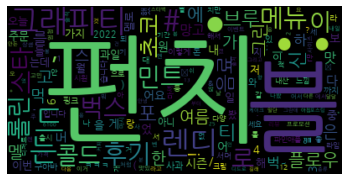

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nanum_gothic = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=nanum_gothic)
image = wordcloud.generate_from_frequencies(bag_of_words)
plt.imshow(image, interpolation='bilinear')
plt.axis("off")

In [ ]:
bag_of_words = {}
for review in reviews:
    if not isinstance(review, str):
        continue
    tokens = tokenizer.pos(review)
    for token, pos in tokens:
        # 단어의 형태소가 체언이 아닌 경우 제외
        # 길이가 2보다 작을 경우 제외 
        if (not pos.startswith("N")) or (len(token) < 2):
            continue
        if token not in bag_of_words:
            bag_of_words[token] = 0
        bag_of_words[token]+=1
bag_of_words

(-0.5, 399.5, 199.5, -0.5)

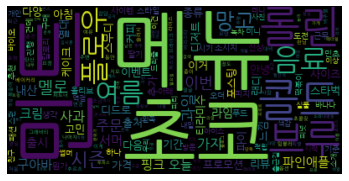

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nanum_gothic = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

stopwords = ["펀치", "그래피티", "블렌디드", "후기", "렌디", "스타", "벅스", "스타벅스"]
for stopword in stopwords:
    if stopword in bag_of_words:
        del bag_of_words[stopword]
    
wordcloud = WordCloud(font_path=nanum_gothic).generate_from_frequencies(bag_of_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")